<a href="https://colab.research.google.com/github/jpescobarn/AnaliticaDatos/blob/master/ANAL%C3%8DTICA_DE_DATOS_EJERCICIO_FINAL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analítica de Datos 2020-2
## Ejercicio 2 Final  
### Tomás Giraldo Agudelo - Juan Pablo Escobar Naranjo
--- 

## Objetivo

## Utilizando la base de datos de su preferencia, con al menos 4000 muestas, implemente y entrene un esquema de aprendizaje profundo y amplio. Realice un análisis completo en analítica de datos a partir del modelo diseñado y describa la información relevante encontrada y el posible conocimiento (producto, servicio) a generar en la práctica.

# Datos de Netflix

### Se selecciona una base de datos con las ofertas de películas, series, documentales y demás que posee la plataforma. El objetivo que se pretende alcanzar con este procedimiento, es clasificar el material de la plataforma según la aptitud de edad de los usuarios para el contenido. 

In [ ]:
#Datos Netflix https://drive.google.com/file/d/1-4U4feveVrw7ADpprdqPiJn5clryPoIT/view?usp=sharing
#Deserción estudiantil UTP https://drive.google.com/file/d/1tww692CcKoEV4avIW0A9VbSw5gtiRQIs/view?usp=sharing
FILEID = "1-4U4feveVrw7ADpprdqPiJn5clryPoIT"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-12-13 04:59:51--  https://docs.google.com/uc?export=download&confirm=&id=1-4U4feveVrw7ADpprdqPiJn5clryPoIT
Resolving docs.google.com (docs.google.com)... 74.125.142.100, 74.125.142.102, 74.125.142.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-24-docs.googleusercontent.com/docs/securesc/if295im7885ncatnv9mv26gv1tbb4b7i/764k1pat45ibaobcejlmqphtmdob11kf/1607835525000/12288095800397085605/12795004373990112720Z/1-4U4feveVrw7ADpprdqPiJn5clryPoIT?e=download [following]
--2020-12-13 04:59:52--  https://doc-0c-24-docs.googleusercontent.com/docs/securesc/if295im7885ncatnv9mv26gv1tbb4b7i/764k1pat45ibaobcejlmqphtmdob11kf/1607835525000/12288095800397085605/12795004373990112720Z/1-4U4feveVrw7ADpprdqPiJn5clryPoIT?e=download
Resolving doc-0c-24-docs.googleusercontent.com (doc-0c-24-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to 

# Se obtener los datos del archivo CSV

### Se presenta el DataFrame

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
# magic function to render figure
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
dataNetflix = pd.read_csv("netflix_titles.csv", thousands=',')

dataNetflix.head()


Carpeta results ya existe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Se realiza un revisión sobre como estan compuestos los datos para tener una perspectiva general de los datos y enfocar en un análisis adecuado

In [ ]:
print(dataNetflix['rating'].value_counts())
print("-----------------------------------")
print(dataNetflix['listed_in'].value_counts())
print("-----------------------------------")
print(dataNetflix['country'].value_counts())
print("-----------------------------------")
print(dataNetflix.info())


TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64
-----------------------------------
Documentaries                                              299
Stand-Up Comedy                                            273
Dramas, International Movies                               248
Dramas, Independent Movies, International Movies           186
Comedies, Dramas, International Movies                     174
                                                          ... 
Action & Adventure, Comedies, Music & Musicals               1
International TV Shows, TV Mysteries, TV Thrillers           1
International Movies, Romantic Movies, Sci-Fi & Fantasy      1
Crime TV Shows, TV Dramas, TV Horror                         1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows           1
Name: 

# Pre proceso de los datos
##Se crea la clase que permite pre procesar todos los datos


Para analizar la base de datos, se requiere que en el preproceso se completen los datos faltantes en las columnas de interés, Por ello, lo primero que se hace es recorrer la base de datos para encontrar en que atributos faltan instancias. Los datos nulos se llenan mediante un imputador simple, usando la estrategia de "más frecuente", Además, se deben convertir todos las instancias a un mismo formato para poder efectuar el procedimiento.

## Se obtiene el diccionario para trabajar las categorias

In [ ]:
cat_ordinal = ['type','director','country','duration','title','cast','listed_in','description','rating']
items = [] 
for i in cat_ordinal:
    items += [list(dataNetflix[i].value_counts().index)]
categorias_datos = dict(zip(cat_ordinal, items))

categorias_datos['type']


['Movie', 'TV Show']

In [ ]:
#FUNCIONES TRAIDAS DESDE EL ARCHIVO
#%% dummy transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

class preprocesoNetflix(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, categorias_datos):
        self.categorias_datos = categorias_datos 

    def fit(self,X, *_):

        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent") # Se crea el imputador simple con la estrategia de la moda.
        self.a = Xi.columns[np.sum(Xi.isna())> 0] # Se buscan las columnas con datos faltantes 
        self.imputer_num.fit(Xi[self.a]) # Ajustar el imputador simple
        Xi[self.a] = self.imputer_num.transform(Xi[self.a]) #Evaluar datos del imputador 
        
        #VAMOS A REALIZAR EL PROCEDIMIENTO PARA CODIFICAR LAS VARIABLES TIPO OBJECT 
        cat = []
        for i in self.categorias_datos.keys():
            cat = cat + [[*self.categorias_datos.get(i)]]
        self.col_categorias_datos = OrdinalEncoder(categories=cat)
        Xi[[*self.categorias_datos.keys()]] =self.col_categorias_datos.fit_transform(Xi[[*self.categorias_datos.keys()]])

        #self.col_cat = Xi.columns[Xi.dtypes=='O']
        #self.cod = OrdinalEncoder()
        #self.cod.fit(Xi[self.col_cat])
        
        return self    

    def transform(self, X, *_):

        Xi = X.copy()
        Xi[self.a] = self.imputer_num.transform(Xi[self.a])

        
        Xi[[*self.categorias_datos.keys()]] =self.col_categorias_datos.transform(Xi[[*self.categorias_datos.keys()]])
        #Xi[self.col_cat]= self.cod.transform(Xi[self.col_cat])
        
        return Xi
    
    def fit_transform(self,X,*_):
        self.fit(X)
        return self.transform(X)

## Se hace la partición en datos de entrenamiento y validación, además se selecciona como variable de salida **rating**, que indica la clasificación adecuada de edades para los usuarios según el tipo de contenido del material. Se suprimen además, los datos que no ofrecen información útil para el proceso.

In [ ]:
#Importamos Sklearn
from sklearn.model_selection import  train_test_split

#Paso 2: Particion entrenamiento y validación
Xtrain, Xtest = train_test_split(dataNetflix,test_size=0.3)

### Se verifica a que columnas les hace falta información

In [ ]:
a = Xtrain.columns[np.sum(Xtrain.isna())> 0] # Buscar columnas con datos faltantes
Xtrain.isna() 
print(np.sum(Xtrain.isna()))
Xtrain.isna() 

show_id            0
type               0
title              0
director        1355
cast             400
country          311
date_added         8
release_year       0
rating             3
duration           0
listed_in          0
description        0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1034,False,False,False,False,False,True,False,False,False,False,False,False
2960,False,False,False,False,False,False,False,False,False,False,False,False
2873,False,False,False,False,False,False,False,False,False,False,False,False
3270,False,False,False,False,False,False,False,False,False,False,False,False
6160,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,False,False,False,False,False,False,False,False,False,False,False,False
5191,False,False,False,False,True,False,False,False,False,False,False,False
5226,False,False,False,False,False,False,False,False,False,False,False,False
5390,False,False,False,False,False,False,False,False,False,False,False,False


## Se realiza el preproceso indicado para los datos de entrenamiento y test

In [ ]:
dummy = preprocesoNetflix(categorias_datos=categorias_datos)
xtrainPre = dummy.fit_transform(Xtrain)
XtestPre = dummy.transform(Xtest)

col_eliminar = ["date_added","release_year"]
col_sal = ['rating']
ytrain = xtrainPre[col_sal]
ytest = XtestPre[col_sal]
xtrainPre.drop(columns = col_eliminar, inplace = True)
XtestPre.drop(columns = col_eliminar, inplace = True)
xtrainPre.head()

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
1034,81209203,0.0,236.0,531.0,2169.0,0.0,8.0,21.0,7.0,3020.0
2960,80095718,0.0,1261.0,2373.0,3961.0,0.0,6.0,10.0,47.0,5300.0
2873,70298116,0.0,5763.0,3088.0,2485.0,0.0,1.0,21.0,41.0,2303.0
3270,81047899,0.0,2813.0,2657.0,941.0,18.0,1.0,43.0,112.0,1507.0
6160,70143836,1.0,557.0,0.0,2437.0,0.0,0.0,35.0,160.0,1396.0


##Verificamos que tanto los datos de entrenamiento hayan sido preprocesados correctamente

In [ ]:
xtrainPre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4363 entries, 1034 to 860
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   show_id      4363 non-null   int64  
 1   type         4363 non-null   float64
 2   title        4363 non-null   float64
 3   director     4363 non-null   float64
 4   cast         4363 non-null   float64
 5   country      4363 non-null   float64
 6   rating       4363 non-null   float64
 7   duration     4363 non-null   float64
 8   listed_in    4363 non-null   float64
 9   description  4363 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 374.9 KB


## Se presenta la matriz de correlación de los datos de entrenamiento preprocesados


In [ ]:
corr_matrix = xtrainPre.corr() #Correlación del Xtrain preprocesado 
corr_matrix.style.background_gradient(cmap='coolwarm')

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
show_id,1.000000,0.151083,-0.009618,-0.013498,-0.071604,0.015543,-0.188775,-0.136231,-0.137941,-0.033640
type,0.151083,1.000000,0.024919,-0.516980,0.013812,-0.092207,-0.008409,-0.471180,0.200465,-0.001091
title,-0.009618,0.024919,1.000000,-0.007721,-0.009918,0.005178,-0.006396,0.006512,-0.024939,0.014820
director,-0.013498,-0.516980,-0.007721,1.000000,-0.005748,0.086254,-0.018506,0.146017,-0.092421,0.015737
cast,-0.071604,0.013812,-0.009918,-0.005748,1.000000,-0.006821,-0.001720,-0.072408,0.063411,-0.005102
country,0.015543,-0.092207,0.005178,0.086254,-0.006821,1.000000,0.067508,-0.027507,-0.041639,-0.029944
rating,-0.188775,-0.008409,-0.006396,-0.018506,-0.001720,0.067508,1.000000,0.032319,-0.005359,0.001615
duration,-0.136231,-0.471180,0.006512,0.146017,-0.072408,-0.027507,0.032319,1.000000,-0.115633,-0.012993
listed_in,-0.137941,0.200465,-0.024939,-0.092421,0.063411,-0.041639,-0.005359,-0.115633,1.000000,-0.007498
description,-0.033640,-0.001091,0.014820,0.015737,-0.005102,-0.029944,0.001615,-0.012993,-0.007498,1.000000


<function matplotlib.pyplot.show>

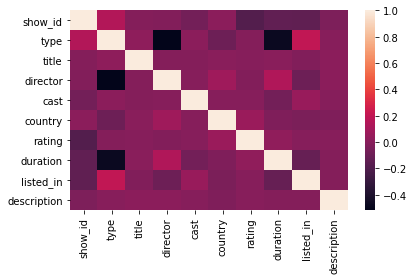

In [ ]:
import seaborn as sns 
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
plt.show

In [ ]:
xtrainPre2 = xtrainPre.copy()
xtrainPre2['rating'] = ytrain
corr_matrix = abs(xtrainPre2.corr()) #Correlación salida 
corr_matrix['rating'].sort_values(ascending= False)

rating         1.000000
show_id        0.188775
country        0.067508
duration       0.032319
director       0.018506
type           0.008409
title          0.006396
listed_in      0.005359
cast           0.001720
description    0.001615
Name: rating, dtype: float64

# Clasificadores

## Clasificador RandomForest

## Se implementó un clasificador "RandomForest" con el cual obtuvimos un mapa con las reglas de decisión para obtener uno de los 14 tipos de ratings ofrecidos por la base de datos, se diseñaron dos modelos de randomforest el primero le agregamos (min_samples_split = 6) que para añadir un punto a una selección debe tener como mínimo 6 ejemplos para considerarse de una categoría específica. El segundo modelo, si se dejo por defecto.

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(min_samples_split=6,random_state=42)
tree_clf2 = DecisionTreeClassifier(random_state=42)
tree_clf.fit(xtrainPre, ytrain)
tree_clf2.fit(xtrainPre, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
names = ['TV-MA','TV-14','TV-PG','R','PG-13','NR','PG',
         'TV-Y7','TV-Y','TV-G','TV-Y7-FV','G','UR','NC-17']
import graphviz 
dot_data = tree.export_graphviz(tree_clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("netflix") 

'netflix.pdf'

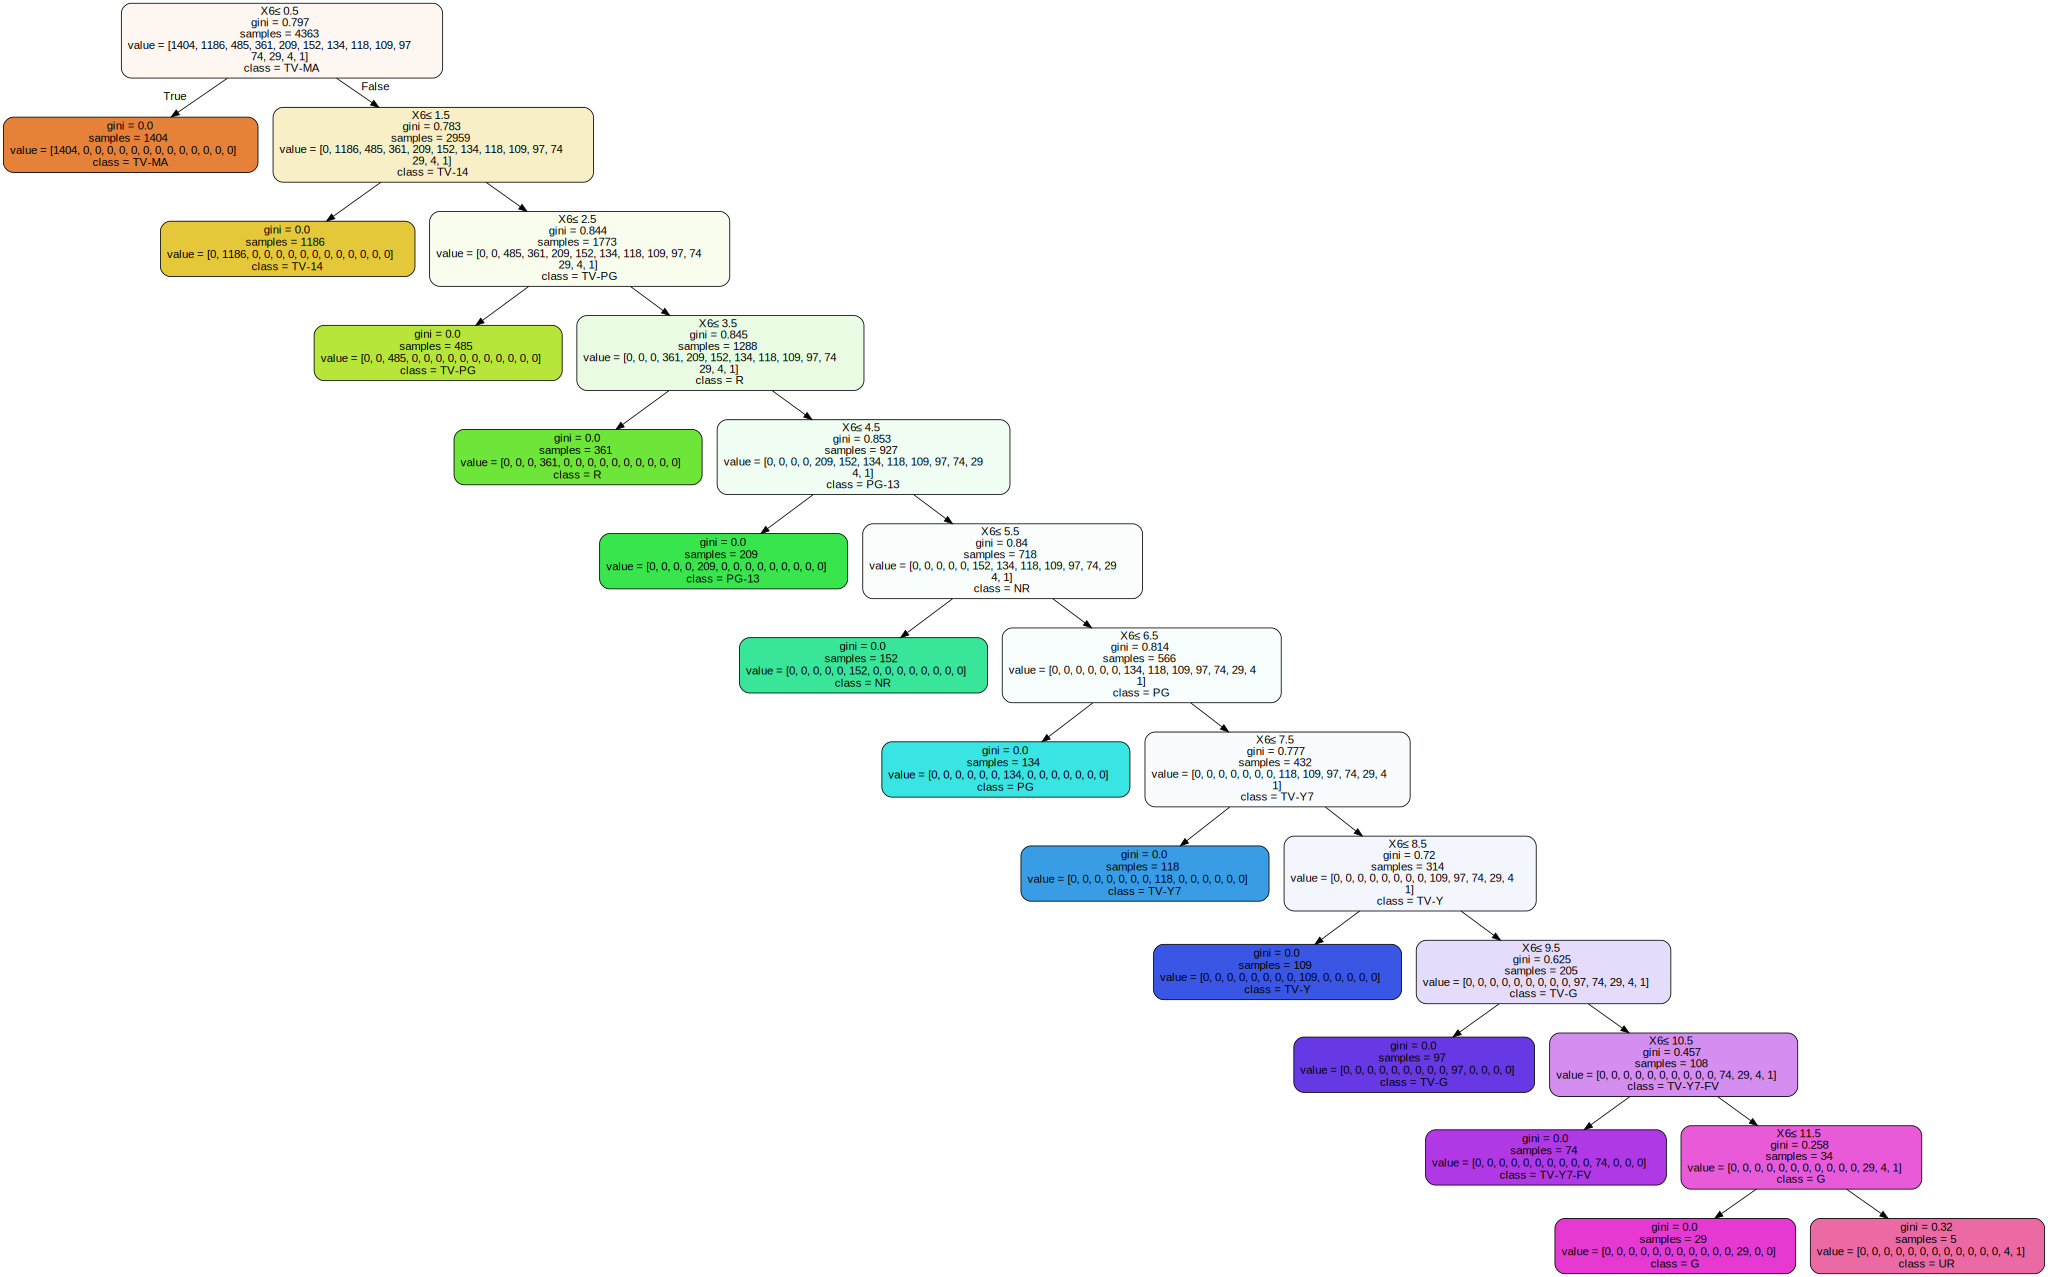

In [38]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                       
                      class_names=names, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [39]:
xtrainPre[:1]


,show_id,type,title,director,cast,country,rating,duration,listed_in,description
1034,81209203,0.0,236.0,531.0,2169.0,0.0,8.0,21.0,7.0,3020.0


In [40]:
!pip install dtreeviz



     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 204.2MB 78kB/s 
     |████████████████████████████████| 204kB 54.1MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52493 sha256=db3a5e8b15a8ecd393bf6496da5048fed3d922e45abadac43a0e68f0de5a9b40
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=1478ee761562f1b590842ba5259df412364117ba3779e9b8c04406177133b46e
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


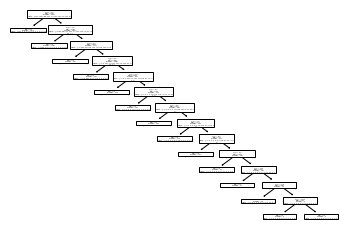

In [41]:

tree.plot_tree(tree_clf2);


In [42]:
result = tree_clf.predict(XtestPre)
result

array([2., 1., 0., ..., 0., 7., 1.])

# Clasificaciones con redes neuronales

In [43]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.Sequential([
  keras.layers.Dense(256,input_shape=(xtrainPre.shape[-1],),kernel_initializer="he_normal",activation="selu"),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.7),
  keras.layers.Dense(16,kernel_initializer="he_normal",activation="selu"),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.7),
  keras.layers.Dense(14, activation="softmax")
])

### EL modelo de la red esta basado en capas densas para realizar la clasificación de los datos, para ayudar a disminuir la variable los utilizamos la capa de normalización. Debido a los 14 diferentes tipos de "ratings" que planeta la base de datos, por eso utilizamos 14 neuronas en la última capa densa con activación softmax

## EL modelo de red neuronal, se mantiene estable y alcanza un 36.6% de acertividad, el resultado obtenido puede ser consecuente a la poca correlación entre las variables de la base de datos presentada, para este caso la clasificación de edades por las características presentadas no es una buena manera de operar con la base de datos.


In [44]:
keras.backend.clear_session()

learning_rate=0.001
num_epoch = 100
batch     = 256

#optimizer = tf.keras.optimizers.RMSprop(lr=learning_rate)
#optimizer = tf.keras.optimizers.Nadam(lr=learning_rate, beta_1=0.9, beta_2=0.999) 
#optimizer = tf.keras.optimizers.Adam(lr=learning_rate) 
optimizer = tf.keras.optimizers.SGD(lr=learning_rate, clipvalue=1.0)

model.summary()
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(xtrainPre,ytrain,epochs=num_epoch,
          validation_split=0.2)


score_test = model.evaluate(XtestPre, ytest, batch_size=batch)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2816      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                2

In [47]:
# ### Resumen de los parámetros, historial, y medidas de Loss y Accuracy

print('Resumen de la ejecución:\n')
print('Parámetros : ',history.params)
print('Claves que se calcularon : ',history.history.keys())

print('\nTest Loss:', score_test[0])
print('Test Accuracy: {:.2f}%'.format(100 * score_test[1]))

Resumen de la ejecución:

Parámetros :  {'verbose': 1, 'epochs': 100, 'steps': 110}
Claves que se calcularon :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Test Loss: 1.8618892431259155
Test Accuracy: 36.77%


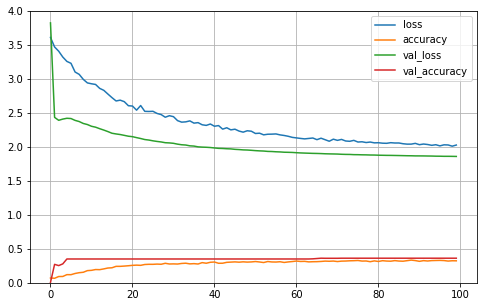

In [48]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 4)
plt.savefig('grafica_train_validation_dropout.pdf', format='pdf', dpi=300)
#save_fig("keras_learning_curves_plot")
plt.show()

## Basados en los resultados obtenidos por los clasificadores, la base de datos no posee suficiente información valiosa para realizar el procedimiento deseado, debido a la baja correlación entre los atributos.